## Part 1

In [0]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier



!rm *.csv  #It is used to delete the uploaded .csv files

In [14]:
from google.colab import files
uploaded = files.upload()
uploaded1 = files.upload()

#Browse to the folder where"cleanTitanicTest.csv" and "cleanTitanicTrain.csv" are located

Saving cleanTitanicTest.csv to cleanTitanicTest.csv


Saving cleanTitanicTrain.csv to cleanTitanicTrain.csv


In [15]:
import io
titanicTest = pd.read_csv(io.BytesIO(uploaded['cleanTitanicTest.csv']))
len(titanicTest)

418

In [16]:
import io
titanicTrain = pd.read_csv(io.BytesIO(uploaded1['cleanTitanicTrain.csv']))
len(titanicTrain)

891

In [0]:
predictorNames= ["Pclass", "Sex", "Age", "SibSp","Parch", "Fare", "Embarked"] 

trainPredictors = titanicTrain[predictorNames]

targetName=['Survived']
trainTarget = titanicTrain['Survived']
testPredictors = titanicTest[predictorNames]
testPIDs = titanicTest['PassengerId']

## Lab 02 Part 01

In [18]:
knn = KNeighborsClassifier(n_neighbors=3) #knn is instance 

knn.fit(trainPredictors, trainTarget) 

testTarget = knn.predict(testPredictors) #all new to the model 

acc_knn = round(knn.score(trainPredictors, trainTarget)*100,2)

#acc_knn = round(knn.score(testPredictors, testTarget)*100,2)  

print(acc_knn)

83.84


In [19]:
##Try with k=5 

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(trainPredictors, trainTarget)
testTarget = knn5.predict(testPredictors)
acc_knn5 = round(knn5.score(trainPredictors, trainTarget)*100,2)
print(acc_knn5)

80.36


In [20]:
##Try with k=25 

knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(trainPredictors, trainTarget)
testTarget = knn25.predict(testPredictors)
acc_knn25 = round(knn25.score(trainPredictors, trainTarget)*100,2)
print(acc_knn25)

73.29


## Part 2.1 : Use a different scoring for cross_val_score (at least 4 tries)

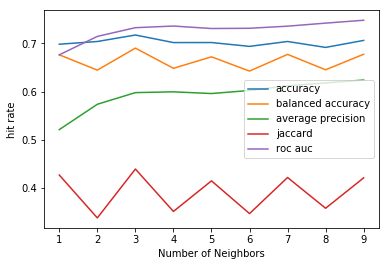

In [21]:
from sklearn.model_selection import cross_val_score
cv_scores=[]
banlanced_scores=[]
average_precision=[]
jaccard=[]
roc_auc=[]

for k in range(1,10):
  
  knn=KNeighborsClassifier(n_neighbors=k)
  
  scores = cross_val_score(knn, trainPredictors, trainTarget, cv=10, scoring ='accuracy')
  scores1 = cross_val_score(knn, trainPredictors, trainTarget, cv=10, scoring ='balanced_accuracy')
  scores2 = cross_val_score(knn, trainPredictors, trainTarget, cv=10, scoring ='average_precision')
  scores3 = cross_val_score(knn, trainPredictors, trainTarget, cv=10, scoring ='jaccard') 
  scores4 = cross_val_score(knn, trainPredictors, trainTarget, cv=10, scoring ='roc_auc')
  
  cv_scores.append(scores.mean())
  
  
  banlanced_scores.append(scores1.mean()) #add each k into the list
  average_precision.append(scores2.mean())
  jaccard.append(scores3.mean())
  roc_auc.append(scores4.mean())
  
  
plt.plot(range(1,10), cv_scores, label='accuracy')
plt.plot(range(1,10), banlanced_scores, label='balanced accuracy')
plt.plot(range(1,10), average_precision, label='average precision')
plt.plot(range(1,10), jaccard , label='jaccard')
plt.plot(range(1,10), roc_auc , label='roc auc')

plt.xlabel('Number of Neighbors')
plt.ylabel('hit rate')
plt.legend();
plt.show()

##  Part 2.2: Experiment with different parameter values in BaggingClassifer (at least 4 tries).

In [22]:
from sklearn.ensemble import BaggingClassifier

#n_estimators=100, base_estimator=None
bagging1 = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, 
                             max_features=1.0, bootstrap=True, bootstrap_features=False, 
                             oob_score=False, warm_start=False,  n_jobs=None, random_state=None, verbose=0)

#n_estimators=10, max_samples=0.5, 
bagging2 = BaggingClassifier(n_estimators=10, max_samples=0.5, 
                             max_features=1.0, bootstrap=True, bootstrap_features=False, 
                             oob_score=False, warm_start=False,  n_jobs=None, random_state=None, verbose=0)

#With KNN
bagging3 = BaggingClassifier(knn, max_samples=0.7, max_features=1.0)


bagging4 = BaggingClassifier(knn, max_samples=0.5, max_features=0.5)

#w/kNN,max_samples=0.5, max_features=0.5
bagging5 = BaggingClassifier(knn,max_samples=0.5, max_features=0.5)


bagging1.fit(trainPredictors, trainTarget)
print("Bagging 1:", bagging1.score(trainPredictors, trainTarget))

bagging2.fit(trainPredictors, trainTarget)
print("Bagging 2:", bagging2.score(trainPredictors, trainTarget))

bagging3.fit(trainPredictors, trainTarget)
print("Bagging 3:", bagging3.score(trainPredictors, trainTarget))

bagging4.fit(trainPredictors, trainTarget)
print("Bagging 4:", bagging4.score(trainPredictors, trainTarget))

bagging5.fit(trainPredictors, trainTarget)
print("Bagging 5:", bagging5.score(trainPredictors, trainTarget))

Bagging 1: 0.9797979797979798
Bagging 2: 0.9135802469135802
Bagging 3: 0.7530864197530864
Bagging 4: 0.8080808080808081
Bagging 5: 0.8159371492704826


## First Decision Tree lab

**Paramater 1:**

In [23]:
DTree = DecisionTreeClassifier(min_samples_leaf=20)

DTree.fit(trainPredictors, trainTarget)

testTarget = DTree.predict(testPredictors)

acc_decision_tree = round(DTree.score(trainPredictors, trainTarget)*100,2)
print(acc_decision_tree)

82.72


**Parameter 2:**

In [24]:
DTree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=20)

DTree.fit(trainPredictors, trainTarget)

testTarget = DTree.predict(testPredictors)

acc_decision_tree = round(DTree.score(trainPredictors, trainTarget)*100,2)
print(acc_decision_tree)

83.16


**Paramater 3:**

In [25]:
DTree = DecisionTreeClassifier(criterion="entropy")

DTree.fit(trainPredictors, trainTarget)

testTarget = DTree.predict(testPredictors)

acc_decision_tree = round(DTree.score(trainPredictors, trainTarget)*100,2)
print(acc_decision_tree)

97.98


**Parameter 4:**

In [26]:


DTree = DecisionTreeClassifier (criterion="gini", splitter="best", max_depth=5, 
                                min_samples_split=3, min_samples_leaf=3, min_weight_fraction_leaf=0.0, 
                                max_features=5, random_state=None, max_leaf_nodes=20, min_impurity_decrease=0.0, 
                                min_impurity_split=None, class_weight=None, presort=False)

DTree.fit(trainPredictors, trainTarget)

testTarget = DTree.predict(testPredictors)

acc_decision_tree = round(DTree.score(trainPredictors, trainTarget)*100,2)
print(acc_decision_tree)

83.95


**Parameter 5 (Default)**

In [27]:

DTree = DecisionTreeClassifier (criterion="gini", splitter="best", max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                min_impurity_split=None, class_weight=None, presort=False)

DTree.fit(trainPredictors, trainTarget)

testTarget = DTree.predict(testPredictors)

acc_decision_tree = round(DTree.score(trainPredictors, trainTarget)*100,2)
print(acc_decision_tree)

97.98


## Random Forests and score your model on Kaggle

In [28]:
myRandomForest = RandomForestClassifier(n_estimators=20, 
                                        min_samples_split=10, 
                                        min_samples_leaf=5)

myRandomForest.fit(trainPredictors, trainTarget)

RFPredictions = myRandomForest.predict(testPredictors)

print(confusion_matrix(trainTarget.head(418), RFPredictions))

print(classification_report(trainTarget.head(418), RFPredictions))

predictedTarget = RFPredictions

mySubmission=pd.DataFrame({'PassengerID': testPIDs, 'Survived': predictedTarget})
mySubmission.iloc[mySubmission['Survived']>0.5, 'Survived'] =1
mySubmission.iloc[mySubmission['Survived']<=0.5,'survived']=0
mySubmission.to.scv('mySubmission.csv', index=False)



[[163  92]
 [113  50]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       255
           1       0.35      0.31      0.33       163

    accuracy                           0.51       418
   macro avg       0.47      0.47      0.47       418
weighted avg       0.50      0.51      0.50       418



NotImplementedError: ignored